# Red con \\(N\gg1\\) grados de libertad

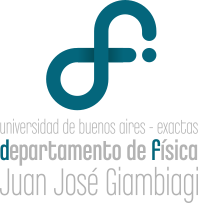  

©2021 [Víctor A. Bettachini](mailto:bettachini@df.uba.ar)  

---

## Enunciado
\\(N\\) partículas de masa \\(m\\) están equiespaciadas en una distancia \\(a\\).
Están sujetas a paredes mediante resortes de coeficiente de dureza \\(k\\) y longitud natural \\(l_0\\).
A su vez, en la dirección en que pueden desplazarse, están vinculadas por resortes con el mismo \\(k\\) pero de longitud natural \\(a > l_0\\).  
![](figuras/g-008.png)
1. Escriba la ecuación de movimiento para la partícula énésima.
	Indique todas las aproximaciones que realiza.
1. Proponga una solución adecuada y halle la relación de dispersión.
	¿Cuál es la frecuencia más baja posible?
1. Imponga las condiciones de contorno apropiadas para el sistema y calcule las frecuencias propias del mismo.
	Escriba la solución para el movimiento de cada partícula.
1. (*) Particularice para el caso \\(N = 2\\) y compare con el resultado que obtiene resolviendo el problema ``matricialmente''.
	Esquematice los modos normales de oscilación.

## Ecuación de movimiento para partícula \\(n\\)

### Potencial asociado a la partícula \\(n\\)

In [1]:
import sympy as sym
from sympy.physics import mechanics as mech
mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración
import warnings
warnings.filterwarnings("ignore")

In [2]:
t = sym.Symbol('t')
k, a, l_0 = sym.symbols('k, a, l_0', positive=True) # parámetros físicos

psi_nMinus = sym.Function('\Psi_{n-1}')(t)
psi_n = sym.Function('\psi_{n}')(t)
psi_nPlus = sym.Function('\psi_{n+1}')(t)

In [3]:
l_superior = sym.sqrt(a**2 + psi_n**2)
l_inferior = sym.sqrt(a**2 + psi_n**2)
l_izquierdo = a + psi_n - psi_nMinus
l_derecho = a + psi_nPlus - psi_n

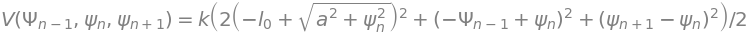

In [4]:
V = sym.Eq(sym.Function('V')(psi_nMinus, psi_n, psi_nPlus),
           k/2* (
               (l_izquierdo - a)**2 + (l_derecho - a)**2 +
               (l_superior - l_0 )**2 + (l_inferior - l_0 )**2
           ) 
          )
V

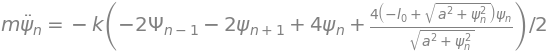

In [5]:
m = sym.Symbol('m', positive=True) # parámetros físicos
psi_n_2a = sym.Eq(m* psi_n.diff(t,2), -V.rhs.diff(psi_n) )
psi_n_2a

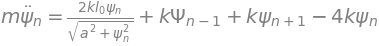

In [6]:
psi_n_2a = psi_n_2a.simplify()
psi_n_2a

In [7]:
def maclaurin1erOrden(segundaLey):
    '''
    Desarrollo en serie de Taylor en torno al origen, o serie de Maclaurin, a primer orden en todas las variables.
    '''
    variables_set = segundaLey.atoms(sym.Function) # regresa un conjunto (set) de las funciones en la expresión  
    origenes = {variable : 0 for variable in variables_set} # diccionario de substituciones de cada variable por '0'
    segundaLey_rhs_1erOrden = segundaLey.rhs.subs(origenes) # Debe ser nula, sirve para verificar
    for variable in variables_set: 
        segundaLey_rhs_1erOrden += segundaLey.rhs.diff(variable).subs(origenes)* variable
    segundaLey_rhs_1erOrden = segundaLey_rhs_1erOrden.collect(variables_set) # collect agrupa lo que multiplica a su argumento
    return sym.Eq(segundaLey.lhs, segundaLey_rhs_1erOrden)

psi_n_2a1erOrden = maclaurin1erOrden(psi_n_2a)
psi_n_2a1erOrden

## Solución para la dinámica

Podemos probar con una solución como la del enunciado del problema anterior

In [8]:
A_p, n, k_p, alpha_p = sym.symbols(r'A^{(p)}, n, k^{(p)}, \alpha^{(p)}')
A_n = sym.Symbol('A_n')
A_n_p_enunciado = sym.Eq(A_n, A_p* sym.cos(n* k_p* a + alpha_p ) )
A_n_p_enunciado

In [9]:
omega, phi = sym.symbols(r'\omega^{(p)}, \phi^{(p)}')
psi_n_p = sym.Function('\psi_n^{(p)}')(t)
psi_n_p_enunciado = sym.Eq(psi_n_p , A_n_p_enunciado.rhs* sym.cos(omega * t + phi ) )
psi_n_p_enunciado

Una alternativa es re-escribir la parte espacial \\(A_n^{(p)}\\) con dos funciones trigonométricas

In [10]:
B_p, C_p = sym.symbols(r'B^{(p)}, C^{(p)}')
A_n_p_propuesta = sym.Eq(A_n, B_p*sym.sin(n*k_p*a )+  C_p*sym.cos(n*k_p*a ) )
A_n_p_propuesta

In [11]:
psi_n_p_propuesta = sym.Eq(psi_n_p , A_n_p_propuesta.rhs* sym.cos(omega * t + phi ) )
psi_n_p_propuesta